# Clusteranalyse

Bei der Clusteranalyse, häufig auch einfach Clustern oder Clustering genannt, sucht man Gruppen von verwandten Objekten in einer Menge von Instanzen. Diese Gruppen nennt man auch Cluster. Betrachten wir das Beispiel im unten gezeicgten Bild. Auf der linken Seite sehen wir verschiedene Emoticons, unsere Objekte. Beim Clustern werden die Objekte jetzt in Gruppen unterteilt, in diesem Fall in zwei Gruppen: die glücklichen Emoticons und die traurigen Emoticons. Die Gruppen werden basierend auf den Merkmalen der Objekte bestimmt, andere Informationen stehen nicht zur Verfügung. Um die Trennung in glücklich und traurig zu erreichen, müssen diese Emotionen also von den Merkmalen repräsentiert werden. Wenn die Merkmale etwas anderes beschreiben würden, zum Beispiel die Farbe, würde das Ergebnis des Clusterns ein anderes sein: eine Trennung in gelbe und orange Emoticons. Wenn die Merkmale die Menge der Haare im Gesicht der Emoticons beschreiben würden, dann würde man die Emoticons ohne Bart von denen mit einem Schnauzer trennen. Auch wenn dies auf den ersten Blick offensichtlich erscheint, ist dieser Punkt extrem wichtig: Wenn die Merkmale nicht zur gewünschten Gruppierung passen, finden wir vielleicht trotzdem Gruppen, doch diese sind möglicherweise nicht sinnvoll für unseren Anwendungsfall.


<img src=https://data-science-crashkurs.de/_images/clustering_general.png width=600px>

Etwas abstrakter können wir Clustern wie beschreiben. Wir haben Objekte, für die wir mithilfe von einem Clusteralgorithmus eine sinnvolle Gruppierung suchen. Ohne die gefundenen Gruppen manuell zu analysieren, weiß man nicht, was die Gruppen repräsentieren und ob die Beziehung zwischen den Objekten wirklich sinnvoll ist.

<img src=https://data-science-crashkurs.de/_images/abstract_clustering_german.png width=600px>

Formal haben wir eine Menge von Objekten $O = \{object_1, object_2, ...\}$, die möglicherweise unendlich viele Elemente enthält. Außerdem haben wir eine Repräsentation der Objekte als Instanzen im Merkmalsraum $\mathcal{F} = \{\phi(o): o \in O\}$. Beim Clustern betrachtet man in der Regel numerische Merkmale, das heißt, jede Instanz ist ein reellwertiger Vektor und es gilt also $\mathcal{F} \subseteq \mathbb{R}^d$. Das Gruppieren der Objekte wird beschrieben durch eine Abbildung $c: \mathcal{F} \to G$, wobei $G =\{1, ..., k\}$ die Cluster sind und $k \in \mathbb{N}$ die Anzahl der Cluster. 

## Ähnlichkeitsmaße

Die Grundvoraussetzung, um ähnliche Objekte gruppieren zu können, ist, dass man ihre Ähnlichkeit messen kann. Beim Clustern ist der Ansatz hierfür, die Ähnlichkeit über den *Abstand* im Merkmalsraum zu messen. Je näher die Instanzen von Objekten einander sind, desto ähnlicher sind sie. Je weiter entfernt sie voneinander sind, desto verschiedener. Es gibt verschiedene Metriken, mit denen man Distanzen messen kann. In der Regel wird eine der folgenden drei Metriken verwendet.

Die mit großem Abstand üblichste Metrik ist der *euklidische Abstand*, den wir uns geometrisch als die direkte Verbindung zwischen zwei Punkten vorstellen können ({numref}`fig-euclidean`). Der euklidische Abstand wird über die euklidische Norm $||\cdot||_2$ definiert als

$$d(x,y) = ||y-x||_2 = \sqrt{(y_1-x_1)^2+...+(y_n-x_n)^2}.$$


<img src=https://data-science-crashkurs.de/_images/euclidean.png width=200px></img>


Ein weiteres verbreitetes Distanzmaß ist die *Manhattan-Distanz*. Der Ursprung des Namens ist darin begründet, dass diese Metrik ähnlich ist zu der Distanz, die man in Manhattan gehen muss, wenn man sich in den gitterartig angelegten Straßen bewegt. Da diese Straßen zum Großteil achsenparallel sind, kann man nicht diagonal gehen. Die Manhattan-Distanz wird über die Manhattan-Norm $||\cdot||_1$ definiert als

$$d(x,y) = ||y-x||_1 = |y_1-x_1|+...+|y_n-x_n|.$$

Der Einsatz der Manhattan-Distanz ist zum Beispiel bei sehr hochdimensionalen Daten sinnvoll, also bei Daten mit vielen Merkmalen. Hier gibt es die Tendenz bei der euklidischen Norm, dass alle Abstände ähnlich werden können. Außerdem ist die Manhattan-Norm robuster gegen Ausreißer bei einzelnen Merkmalen, da die Werte der Merkmale nicht vor dem Aufsummieren quadriert werden.


<img src=https://data-science-crashkurs.de/_images/manhatten.png  width=200px></img>


## Städte und Häuser

Wir benutzen eine Analogie, um die Konzepte der Clusteralgorithmen zu erklären: Unsere Objekte sind Häuser und unsere Cluster sind Städte. Das Schöne an dieser Analogie ist, dass sie intuitiv plausibel ist. Man muss nicht wissen, zu welcher Stadt ein Haus gehört, um zu erkennen, welche weiteren Häuser zu dieser Stadt gehören. Man muss auch nicht wissen, wie viele Städte es gibt, um das zu erkennen. Es reicht, wenn man die Position der Häuser betrachtet. Das ist genau das Problem, das wir mit Clusteralgorithmen lösen wollen: Welche Objekte gehören zum gleichen Cluster und wie viele Cluster gibt es?

## $k$-Means-Algorithmus

Eine Variante, um Städte zu definieren, könnte mithilfe der Rathäuser erfolgen. Man könnte sagen, dass jedes Haus zu der Stadt gehört, deren Rathaus am nächsten liegt. Diese Idee ist die Essenz des $k$-Means-Algorithmus. Man beschreibt Cluster durch ihr *Zentrum*. Dieses Zentrum nennt man auch *Centroid*, weshalb es sich bei $k$-Means auch um einen Vertreter der *centroidbasierten Clusteralgorithmen* handelt.

Wenn man wissen möchte, zu welchem Cluster eine Instanz gehört, muss man lediglich herausfinden, welcher Centroid am nächsten ist. Das $k$ im Namen des Algorithmus steht für die Anzahl der Cluster. Formal haben wir die Centroids $C_1, ..., C_k$ und eine Metrik $d$, um den Abstand zu messen. Wir können für jede Instanz $x \in \mathcal{F}$ estimmen, zu welchem Cluster sie gehört, indem wir das Minimum bestimmen:

$$c(x) = \arg\min_{i=1,...,k} d(x, C_i)$$

bestimmen. 

Das folgende Beispiel zeigt, wie wir Daten in $k=4$ Cluster unterteilen. Die Centroids sind als große graue Punkte dargestellt, die anderen Farben zeigen die Clusterzugehörigkeit.

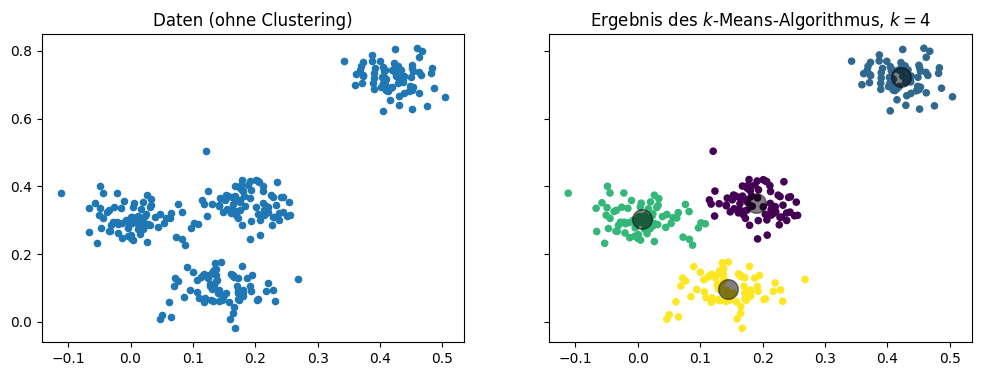

In [1]:
# we need matplotlib for plotting
import matplotlib.pyplot as plt
# we use sklearn to generate data and for the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate sample data, the _ means that we ignore the second return value
X, _ = make_blobs(n_samples=300, centers=4, center_box=(0, 1),
                  cluster_std=0.04, random_state=1)

# we fit a k-means model with four clusters
# then we predict for each point to which cluster it belong
# finally, we determine the location of the cluster centers
# n_init, init and random_state should usually not be set. 
# we only use these parameters to make sure we have results
# that we can re-use later to demonstrate how the algorithm works
kmeans = KMeans(n_clusters=4, n_init=1, init='random', random_state=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# now we plot the data and the clustering results
f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
axes[0].set_title('Daten (ohne Clustering)')
axes[0].scatter(X[:, 0], X[:, 1], s=20)

axes[1].set_title('Ergebnis des $k$-Means-Algorithmus, $k=4$')
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

Diese Darstellung der Cluster ist einfach, effektive und intuitiv. Der Nachteil dieser Darstellung von Clustern ist, dass dies nur mit zwei Merkmalen funktioniert. Wenn man mehr als zwei Merkmale hat, muss man entweder paarweise Scatterplots nutzen oder eine Technik wie die PCA einsetzen, um eine zweidimensionale Darstellung zu bekommen.

### Der Algorithmus

Ziel des Clusteralgorithmus ist es, die Positionen der Centroids zu bestimmen. Wenn wir uns wieder eine Stadt vorstellen, könnte man argumentieren, dass der Platz, an dem ein Rathaus gebaut werden soll, so gewählt werden sollte, dass der mittlere Abstand der Häuser zum Rathaus minimiert wird. Dann haben die Bewohner - im Mittel - den kürzesten Weg zum Rathaus. Jetzt stellen Sie sich vor, dass ein Neubaugebiet entsteht, außerdem werden an anderer Stelle ein paar alte Häuser abgerissen. Hierdurch ist der Ort des Rathauses nicht mehr optimal und idealerweise wird es neu gebaut, sodass der Abstand wieder minimiert wird. Hier ist die Analogie problematisch: Der Neubau eines Rathauses ist teuer, einen Centroid zu verschieben jedoch sehr einfach. Diese Idee ist also genau das, was der Algorithmus macht.

Seien $X \subseteq \mathcal{F}$ unsere Daten. Der $k$-Means-Algorithmus bestimmt die Cluster bzw. die Centroids durch folgenden iterativen Algorithmus:

1. Wähle die Startposition der Centroids $C_1, ..., C_k \in \mathcal{F}$.
2. Bestimme die Cluster $X_i = \{x \in X: c(x) = i\}$ für $i=1,...,k$. 
3. Verschiebe die Centroids, sodass der neue Ort des Centroids dem arithmetischen Mittel der Instanzen des Clusters entspricht: $C_i = \frac{1}{|X_i|} \sum_{x \in X_i} x$.
4. Wiederhole die Schritte 2 und 3, bis
   - das Ergebnis konvergiert, also sich die Cluster $C_1, ..., C_k$ nicht mehr verändern, oder
   - eine vorher festgelegte Höchstanzahl an Iterationen erreicht ist.

Auch wenn dieser Algorithmus relativ abstrakt klingt, wird schnell klar, wie er funktioniert, wenn wir uns die Schritte veranschaulichen.

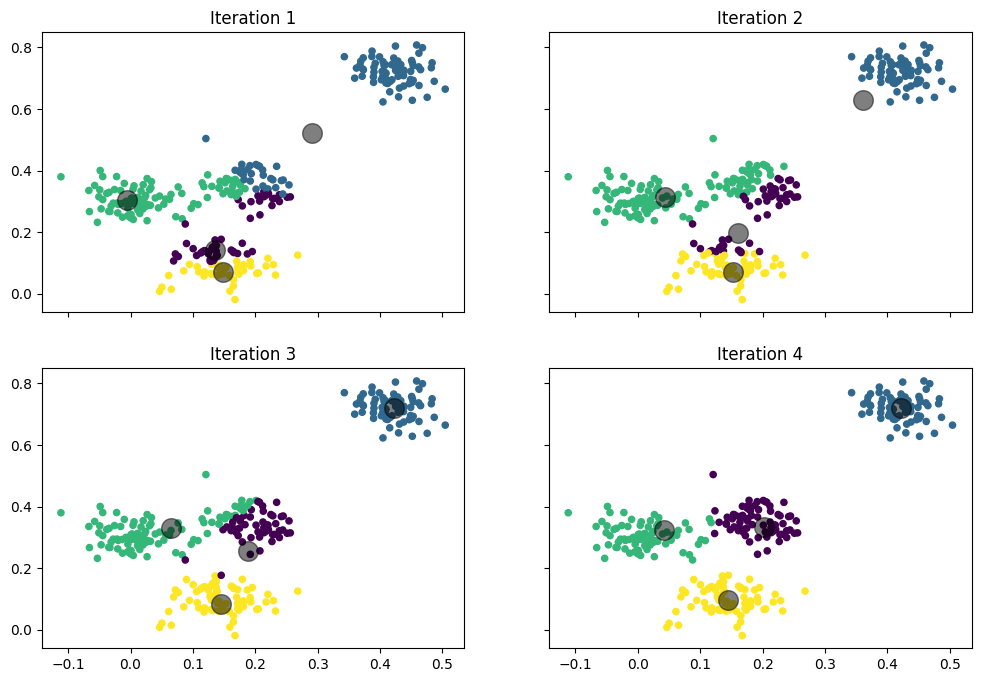

In [2]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

# run the algorithm with k=1,...,4 iterations to demonstrate how it converges
for iter in range(1,5):
    kmeans = KMeans(n_clusters=4, max_iter=iter, n_init=1, init='random', random_state=8)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    ax = axes[min(1,max(0, iter-2)), (iter-1)%2]
    ax.set_title('Iteration %i' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Im Detail passiert das Folgende:

- Iteration 1: Zuerst sehen wir den Startzustand mit zufällig gewählten Centroids und daher auch einer relativ zufälligen Aufteilung der Instanzen in Cluster. Ein Centroid befindet sich zwischen den Instanzen oben rechts und unten links. Dieser Centroid liegt am nächsten zu den gelb markierten Instanzen oben rechts sowie einer einzelnen Instanz. Ein weiterer Centroid liegt mittig in der unteren Hälfte der Daten und hat die blauen Instanzen zugewiesen bekommen. Außerdem gibt es noch zwei Centroids, die sich recht nah beieinander in der linken unteren Hälfte der Daten befinden und diese vertikal teilen: Der obere Centroid hat die grünen Instanzen, der untere die lila Instanzen. Die grünen Instanzen reichen bis in die Mitte der Daten.
- Iteration 2: Die Centroids werden entsprechend der ihnen zugewiesenen Instanzen verschoben, sodass sie basierend auf der Zuweisung aus Iteration 1 mittig liegen. Hierdurch bewegt sich der gelbe Centroid nach oben rechts in die Ecke, wo er auch für die weiteren Iterationen stabil bleibt. Der blaue Centroid bewegt sich etwas nach unten, da der Großteil der zugewiesenen Instanzen am unteren Rand der Daten liegt. Der grüne Centroid bewegt sich etwas nach rechts, da ihm einige Instanzen aus der Mitte zugewiesen wurden. Der lila Centroid bewegt sich zwar kaum, bekommt aber mehr Instanzen am linken Rand zugewiesen, da sich der grüne Centroid nach rechts bewegt hat.
- Iteration 3: Man sieht, wie das Ergebnis anfängt zu konvergieren. Der blaue Centroid liegt jetzt bereits zentral in der unteren mittleren Gruppe. Der grüne Centroid ist noch weiter nach rechts gewandert, sodass er bereits alle Instanzen in der mittleren Gruppe zugewiesen bekommt. Hierdurch hat der lila Centroid freies Spiel auf der linken Seite und bekommt die Instanzen in dieser Gruppe.
- Iteration 4: Nach nur vier Iterationen haben wir bereits ein sehr gutes Ergebnis und eine klare Trennung in vier Cluster.

### Bestimmen von $k$

Im obigen Beispiel haben wir $k=4$ benutzt, also nach vier Clustern gesucht. Wie man einen geeigneten Wert für $k$ bestimmt, haben wie noch offengelassen. Bevor wir uns im Detail damit befassen, betrachten wir erst einmal, wie sich das Ergebnis mit verschiedenen Werten für $k$ ändert.

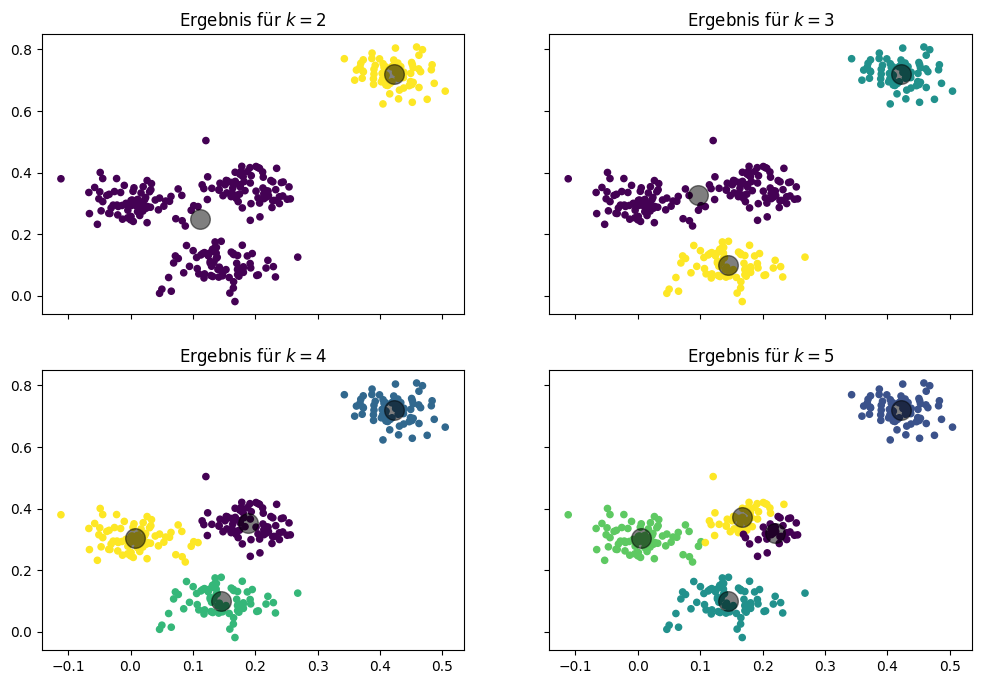

In [3]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

k = range(2,6)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2, n_init='auto')
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    ax = axes[min(1,max(0, iter-3)), (iter)%2]
    ax.set_title('Ergebnis für $k=%i$' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

Mit $k=2$ bekommen wir ein sehr großes Cluster und ein kleineres Cluster oben rechts. Mit $k=3$ zerfällt das große Cluster in zwei Gruppen, sodass wir ein Cluster oben rechts, ein Cluster in der Mitte und ein Cluster unten haben. Mit $k=4$ zerfällt das mittlere Cluster in zwei Gruppen, so wie wir es im Beispiel auch hatten. Mit $k=5$ zerfällt das Cluster in der Mitte in eine obere und eine untere Hälfte. Die Ergebnisse für $k=2, 3, 4$ sehen alle sinnvoll aus. Man kann argumentieren, dass $k=2$ ein gutes Ergebnis ist, da es eine große Lücke zwischen den Instanzen in der oberen Ecke und den anderen Daten gibt. Alle anderen Lücken sind kleiner. Man kann auch sagen, $k=3$ sei gut, da es sich bei den Daten in der Mitte auch um ein langgezogenes Cluster handeln könnte. Bei $k=4$ kann man argumentieren, dass alle Cluster eine ähnliche Anzahl von Daten und eine ähnliche Form haben, auch wenn einige Cluster recht nah beieinander liegen. Für $k=5$ findet man jedoch keine Begründung mehr, warum dieses Ergebnis besser sein könnte als die anderen: Die Trennung des mittleren Clusters in zwei Cluster ergibt einfach keinen Sinn.

Wichtig ist auch die Erkenntnis, dass verschiedene Clusterergebnisse und insbesondere auch die Anzahl von Clustern zu sinnvollen Ergebnissen führen können und oft nicht klar ist, welches Ergebnis das beste ist. Welches Ergebnis man favorisiert, hängt dann vom Anwendungsfall ab: Durch eine manuelle Analyse der Bedeutung der Cluster kann man verstehen, welche Gruppen die Cluster repräsentieren, und damit die Ergebnisse einordnen, um zu verstehen, welches Ergebnis am besten passt.

Beim $k$-Means-Algorithmus gibt es verschiedene Aspekte, die die Auswahl von $k$ beeinflussen:

- Das Domänenwissen über die Daten und den Anwendungsfall. Mithilfe des Domänenwissens kann man bewerten, ob die Daten innerhalb eines Clusters sich wirklich ähnlich sind oder auch ob sich verschiedene Cluster eventuell ähnlich sind. Wenn man bemerkt, dass die Daten innerhalb eines Clusters verschieden sind, ist das ein Indikator für die Erhöhung von $k$. Wenn man bemerkt, dass ähnliche Objekte in verschiedenen Clustern liegen, kann es helfen, $k$ zu reduzieren. Je nach Anwendungsfall kann es auch möglich sein, dass eine bestimmte Anzahl von Clustern gesucht wird. Wenn man zum Beispiel eine binäre Trennung der Daten in zwei Gruppen erreichen möchte, ist durch den Anwendungsfall $k=2$ bereits vorgegeben.
- Visualisierungen sind ein mächtiges Werkzeug, um zu erkennen, wie gut die Cluster die Daten gruppieren, wie die Daten innerhalb eines Clusters verteilt sind und ob es klar erkennbare Lücken zwischen den Clustern gibt. Visualisierung ist zum Beispiel auch das Werkzeug, mit dem wir im obigen Beispiel verschiedene Werte von   beurteilt haben.

Es gibt auch einen analytischen Ansatz, um $k$ zu bestimmen, der auf der *Within-Sum-of-Squares* (WSS) basiert. Um zu verstehen, was WSS ist, müssen wir uns noch einmal an die Grundlagen des Algorithmus erinnern. Die Centroids werden in jeder Iteration so aktualisiert, dass sie das arithmetische Mittel der Daten in dem Cluster sind. Das bedeutet automatisch auch, dass die *Varianz* innerhalb eines Clusters vom Centroid minimiert wird. Die Varianz ist das Quadrat der Standardabweichung und kann berechnet werden, indem man die Summe der quadratischen Distanzen vom arithmeti-schen Mittel bildet. Da der Centroid auf das arithmetische Mittel gesetzt wird, minimiert die Aktualisierung der Position des Centroids also die *Summe der Quadrate* (Sum-of-Squares) *innerhalb* (Within) eines Clusters. Entsprechend ist WSS nichts anderes als ein Maß dafür, wie gut es gelingt, die Varianz innerhalb eines Clusters zu miniminieren und ist definiert als

$$WSS = \sum_{i=1}^k\sum_{x \in X_i} d(x, C_i)^2.$$

Wir haben oben bereits anhand der Visualisierung diskutiert, wie gut verschiedene Werte von $k$ sind. Da es für zufällig generierte Daten kein Domänenwissen gibt, können wir dies auch nicht nutzen, um die Cluster zu bewerten. Wir können verschiedene Werte von $k$ jedoch mithilfe der WSS bewerten. Hierzu zeichnet man am besten ein einfaches Liniendiagramm, das die WSS für verschiedene Werte von $k$ vergleicht.

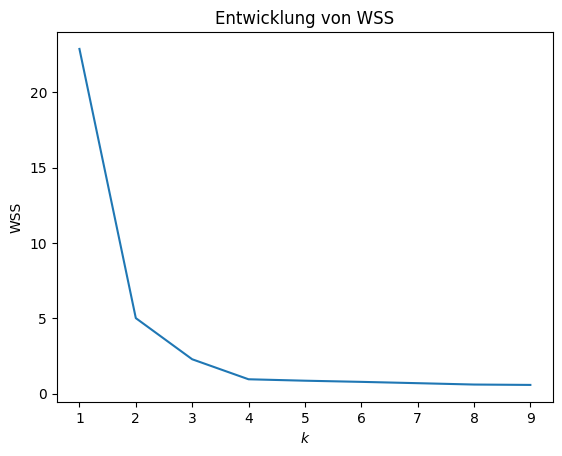

In [4]:
# sklearn calls the WSS inertia
inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2, n_init='auto')
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ )

fix, ax = plt.subplots()
ax.set_title("Entwicklung von WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

Wie man sieht, gibt es einen starken Abfall der WSS von 2 nach 3 und von 3 nach 4. Ab 4 bleibt die WSS nahezu konstant. Außerdem sieht man, dass sich die Steigung bei den Werten 2, 3 und 4 stark ändert und die Kurve langsam abflacht. Diese Änderungen der Steigung nennt man auch *Ellenbogen* bzw. *Elbows*, da sie ein wenig dem Ellenbogen eines gebeugten Arms ähneln. Wenn wir die WSS nutzen, um $k$ auszuwählen, finden wir geeignete Werte an diesen Ellenbogen. Der Grund liegt darin, dass wenn sich die Kurve nicht abflacht, sondern weiter gleich steil abfällt, die Verbesserung auch gleich bleibt. Es gibt also keinen guten Grund, ein $k$ zu wählen, wo es keinen Ellenbogen gibt, da $k+1$ genauso so viel besser ist als $k$, wie $k$ als $k-1$.

Die WSS-Kurve fällt monoton ab. Das bedeutet das $WSS(k+1) \leq WSS(k)$ für alle $k>1$. Daher kann man $k$ auch leider nicht als das Minimum der WSS auswählen, da dies einfach bei $k=|X|$ erreicht wird. Der Grund dafür ist, dass die Varianz sich reduziert, wenn wir mehr Cluster hinzufügen. Das Minimum wird erreicht, wenn $d(x, C_{c(x)})=0$ für alle $x \in X$. Unter der Annahme das es keine Instanzen mit identischen Werten gibt, braucht man also $|X|$ Cluster um das Minimum zu erreichen. Wie man in der obigen Grafik aber sieht, wird der Abfall der WSS schon deutlich früher sehr klein, im Beispiel bei $k=4$. Entsprechend kann man $k$ gut durch eine visuelle Analyse der WSS auswählen, nicht jedoch durch einen Automatismus der die WSS minimiert. 

### Probleme des $k$-Means-Algorithmus

Obwohl das Konzept des $k$-Means-Algorithmus relativ einfach ist, bekommt man häufig gute Ergebnisse. Es gibt jedoch einige Probleme mit $k$-Means, die man kennen sollte. 

- $k$-Means ist sensitiv bezüglich der Auswahl der Startcentroids. Je nachdem wie die Centroids gewählt werden, kann es andere Clusterergebnisse geben. Man sagt dann, dass das Ergebnis nicht stabil ist. Entsprechend sollte man $k$-Means mehrfach mit verschiedenen Startcentroids ausführen. Wenn das Ergebnis instabil ist, ist das ein Indikator dafür, dass die Anzahl der Cluster eventuell anders gewählt werden sollte.
- Ein schlechter Wert von $k$ liefert möglicherweise schlechte Ergebnisse. Da man $k$ manuell auswählen muss, sollte man die nötige Erfahrung mit dem Algorithmus haben, damit man $k$ gut auswählen kann, um schlechte Ergebnisse zu vermeiden.
- Alle Merkmale sollten einen ähnlichen Wertebereich haben, im Idealfall sogar denselben. Andernfalls können die Unterschiede im Wertebereich zu einer ungewollten Gewichtung der Merkmale führen. Betrachten wir hierfür ein Beispiel mit zwei Merkmalen: Alter in Jahren und das Bruttojahreseinkommen in Euro. Das Alter ist (grob) zwischen 0 und 100, das Einkommen in Euro ist selbst bei Minijobs schon bei $12\cdot 450=5.400$ Euro, kann aber auch im sechsstelligen Bereich liegen. Das heißt, dass wenn man die Abstände zwischen zwei Instanzen berechnet, das Alter irrelevant ist. Alles, was zählt ,ist das Einkommen, da hier die Abstände deutlich größer sind. Der höhere Wertebereich sorgt also dafür, dass das Einkommen stärker gewichtet wird.
- Weil die Cluster basierend auf der Distanz zugewiesen werden, tendieren die Cluster dazu, rund zu sein. Wenn die Cluster nicht rund sind, kann man sie häufig auch nicht gut durch Centroids beschreiben. Ein Beispiel dafür sind die zwei Halbmonde, die wir unten sehen. Man kann klar erkennen, dass es sich um zwei Halbkreise handelt, jeder sollte ein Cluster sein. $k$-Means kann diese Cluster aufgrund ihrer Form nicht finden.

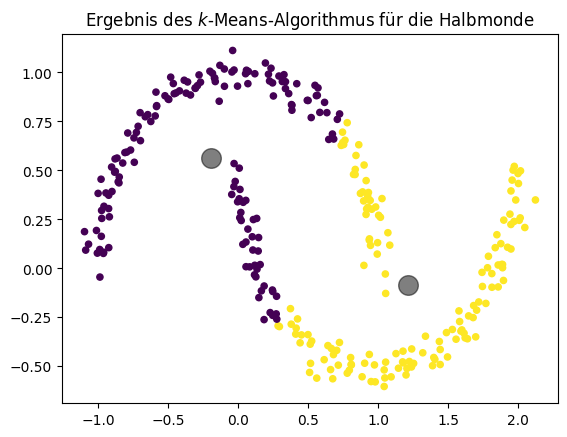

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# this generates our halfmoon data
X,_ = make_moons(n_samples=300, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

fig, ax = plt.subplots()
ax.set_title('Ergebnis des $k$-Means-Algorithmus für die Halbmonde')
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()